# Part 1. Data Loading and Splitting [3pt EXPLORATORY]
Download the anonymized data provided on Quercus. Split the data into training, validation, and test sets.

Note: Data splitting is not as trivial in this assignment. We want our test set to closely resemble the setting in which our model will be used. In particular, our test set should contain hands that are never seen in training!

Explain how you split the data, either by describing what you did, or by showing the code that you used. Justify your choice of splitting strategy. How many training, validation, and test images do you have?



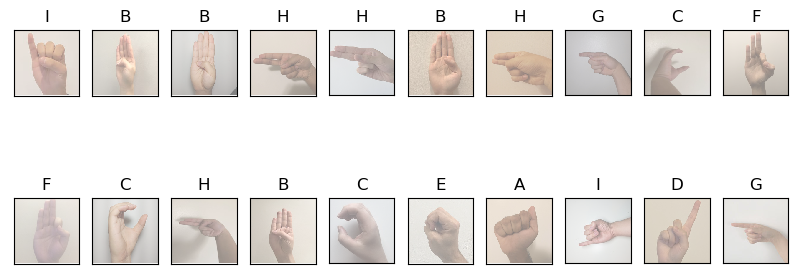

In [26]:
import torch    
import torchvision    
import numpy as np  
import matplotlib.pyplot as plt  
from torchvision import datasets, transforms    
  
# Define your transformations    
transform = transforms.Compose([  
    transforms.Resize([224, 224]),    # resize images to 224 x 224    
    transforms.ToTensor(),           # convert to tensor    
])  
  
# Use ImageFolder    
dataset = datasets.ImageFolder(root='/Users/aordorica/Documents/UofT/MIE 1517/A2/Lab_3b_Gesture_Dataset', transform=transform)    
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)    
  
# Function to convert image from tensor to numpy for visualization    
def imshow(img):    
    img = img / 2 + 0.5     # unnormalize if normalization is applied in transformation    
    npimg = img.numpy()    
    plt.imshow(np.transpose(npimg, (1, 2, 0)))  # rearrange dimensions from (C,H,W) to (H,W,C)    
  
def get_sample_from_class(class_id, dataloader):    
    while True:    
        images, labels = next(iter(dataloader))    
        for i in range(len(images)):    
            if labels[i] == class_id:    
                return images[i], labels[i]    
  
# Get class names    
class_names = dataset.classes # get the class names    
  
# Plotting the images with labels  
def plot_images(images, labels):  
    fig = plt.figure(figsize=(10, 4))  
    for i in np.arange(20):  # Adjust this value according to the number of images in a batch    
        ax = fig.add_subplot(2, 10, i+1, xticks=[], yticks=[])  
        imshow(images[i])    
        ax.set_title(class_names[labels[i]])   
  
# Display images from a batch  
images, labels = next(iter(dataloader))    
plot_images(images, labels)  
  



In [27]:
# # Get a sample from a specific class and display it  
# class_id = class_names.index('G')    
# sample_image, sample_label = get_sample_from_class(class_id, dataloader)    
# imshow(sample_image)    
# plt.title(class_names[sample_label])    
# plt.show()  

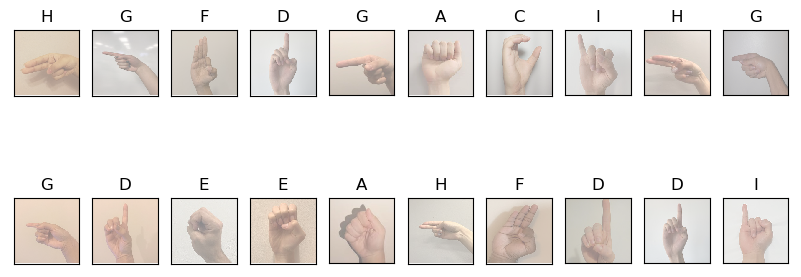

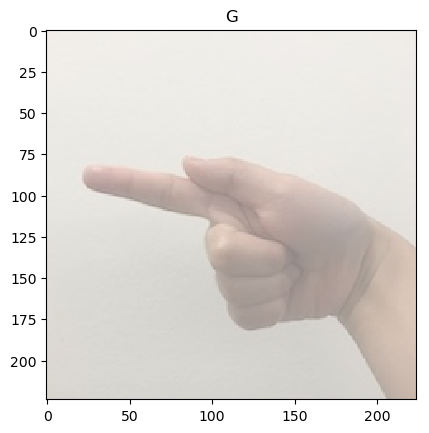

In [28]:
#!/usr/bin/env python  
  
# Import Libraries  
import torch    
import torchvision    
import numpy as np  
import matplotlib.pyplot as plt  
from torchvision import datasets, transforms    
  
# Define Constants  
IMAGE_SIZE = [224, 224]  
BATCH_SIZE = 32  
TRANSFORM = transforms.Compose([  
    transforms.Resize(IMAGE_SIZE),     
    transforms.ToTensor(),             
])  
  
# Functions  
def load_data(dir_name):  
    dataset = datasets.ImageFolder(root=dir_name, transform=TRANSFORM)    
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)    
    class_names = dataset.classes  
    return dataloader, class_names  
  
def unnormalize_and_convert(img):    
    img = img / 2 + 0.5       
    return img.numpy()    
  
def imshow(img):    
    npimg = unnormalize_and_convert(img)  
    plt.imshow(np.transpose(npimg, (1, 2, 0)))    
  
def get_sample_from_class(class_id, dataloader):    
    while True:    
        images, labels = next(iter(dataloader))    
        for i in range(len(images)):    
            if labels[i] == class_id:    
                return images[i], labels[i]    
  
def plot_images(images, labels, class_names):  
    fig = plt.figure(figsize=(10, 4))  
    for i in np.arange(20):   
        ax = fig.add_subplot(2, 10, i+1, xticks=[], yticks=[])  
        imshow(images[i])    
        ax.set_title(class_names[labels[i]])   
    plt.show()  
  
# Main Script  
def main():  
    dataloader, class_names = load_data('/Users/aordorica/Documents/UofT/MIE 1517/A2/Lab_3b_Gesture_Dataset')  
      
    # Display images from a batch  
    images, labels = next(iter(dataloader))    
    plot_images(images, labels, class_names)  
  
    # Get a sample from a specific class and display it  
    class_id = class_names.index('G')    
    sample_image, sample_label = get_sample_from_class(class_id, dataloader)    
    imshow(sample_image)    
    plt.title(class_names[sample_label])    
    plt.show()  
  
if __name__ == "__main__":  
    main()  


The provided code organizes image files into training, validation, and test categories based on their naming format: index_letter_sequence.jpg. This categorization is derived from the prefix index of each filename, directing images to their designated folders (train, val, test) within a central directory. As an example, the '33' in '33_H_22.jpg' determines its classification.

Grouping images by the same index ensures they're placed in a single subset—either training, validation, or test. This grouping is crucial because images with identical indices, albeit with different sequence numbers, may be variations of a single capture. Keeping these variants within one subset avoids potential data leakage. For instance, to prevent a scenario where the model is evaluated on a near-identical version of an image from its training set, the code ensures that all images from the '33' group are in one subset. The underlying assumption is that images with the same index, possibly captured under varied conditions or representing different augmentations of a base photo, share a relationship.

Every index corresponds to photos captured under distinct lighting and hand scenarios. In practical applications, our model would encounter unobserved combinations of these conditions. Hence, it's essential to avoid mixing images of the same lighting and hand conditions between training, validation, and testing. This segregation guarantees our model is tested on genuinely new and varied data, ensuring a robust evaluation.

In [29]:
import os
import shutil
import re

os.chdir("/Users/aordorica/Documents/UofT/MIE 1517/A2/Lab_3b_Gesture_Dataset")
base_dir = '/Users/aordorica/Documents/UofT/MIE 1517/A2/Lab_3b_Gesture_Dataset'


In [31]:
def split_data(letter):  
    letter_dir = os.path.join(base_dir, letter)  
    
    def move_image(src_folder, dest_folder, letter, i):
        # Pattern to match filenames like '33_H_22.jpg', '22_F_18.jpg', etc.
        pattern = re.compile(f"^{i}_{letter}_\d+\.jpg$")
        
        for file_name in os.listdir(src_folder):
            if pattern.match(file_name):
                shutil.move(os.path.join(src_folder, file_name), os.path.join(dest_folder, file_name))

    for i in range(1, 81):  # For training set  
        move_image(letter_dir, train_dir, letter, i)  
    
    for i in range(81, 91):  # For validation set  
        move_image(letter_dir, val_dir, letter, i)  
          
    for i in range(91, 150):  # For test set  
        move_image(letter_dir, test_dir, letter, i)

# Define paths    
train_dir = os.path.join(base_dir, 'train')    
val_dir = os.path.join(base_dir, 'val')    
test_dir = os.path.join(base_dir, 'test')    
    
# Make directories if not exist  
os.makedirs(train_dir, exist_ok=True)    
os.makedirs(val_dir, exist_ok=True)    
os.makedirs(test_dir, exist_ok=True)    
  
# Loop over all letters  
letters = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']  # Adjust this according to your dataset  
for letter in letters:  
    split_data(letter)  

## Part 2. Model Building and Sanity Checking [5pt]
### Part (i) Convolutional Network [2pt MODEL]
Build a convolutional neural network model that takes the (224x224 RGB) image as input, and predicts the gesture letter. Your model should be a subclass of nn.Module. Explain your choice of neural network architecture: how many layers did you choose? What types of layers did you use? Were they fully-connected or convolutional? What about other decisions like pooling layers, activation functions, number of channels / hidden units?